In [1]:
import pandas as pd
import pickle

In [2]:
data=pd.read_csv(r"Downloads/fiat500.csv")

In [3]:
data.columns

Index(['ID', 'model', 'engine_power', 'age_in_days', 'km', 'previous_owners',
       'lat', 'lon', 'price'],
      dtype='object')

In [4]:
data.head(10)

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700
5,6,pop,74,3623,70225,1,45.000702,7.682270,7900
6,7,lounge,51,731,11600,1,44.907242,8.611560,10750
7,8,lounge,51,1521,49076,1,41.903221,12.495650,9190
8,9,sport,73,4049,76000,1,45.548000,11.549470,5600
9,10,sport,51,3653,89000,1,45.438301,10.991700,6000


In [5]:
data.shape

(1538, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
ID                 1538 non-null int64
model              1538 non-null object
engine_power       1538 non-null int64
age_in_days        1538 non-null int64
km                 1538 non-null int64
previous_owners    1538 non-null int64
lat                1538 non-null float64
lon                1538 non-null float64
price              1538 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 108.2+ KB


In [7]:
#data statistics
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [8]:
#checking NULL values
data.isnull().sum()

ID                 0
model              0
engine_power       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64

In [9]:
data.shape

(1538, 9)

In [10]:
data['model'].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [11]:
data['engine_power'].unique()

array([51, 74, 73, 62, 63, 66, 77, 58], dtype=int64)

In [12]:
data['previous_owners'].unique()

array([1, 2, 3, 4], dtype=int64)

In [13]:
#Data cleaning method
data.groupby('model').count()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
model,,,,,,,,
lounge,1094,1094,1094,1094,1094,1094,1094,1094
pop,358,358,358,358,358,358,358,358
sport,86,86,86,86,86,86,86,86


In [14]:
data.groupby('previous_owners').count()

,ID,model,engine_power,age_in_days,km,lat,lon,price
previous_owners,,,,,,,,
1,1389,1389,1389,1389,1389,1389,1389,1389
2,117,117,117,117,117,117,117,117
3,23,23,23,23,23,23,23,23
4,9,9,9,9,9,9,9,9


In [15]:
import seaborn as sns

In [16]:
data.corr()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
ID,1.000000,-0.034059,-0.060753,-0.006537,0.007803,-0.058207,0.058941,0.028516
engine_power,-0.034059,1.000000,0.319190,0.285495,-0.005030,0.005721,-0.005032,-0.277235
age_in_days,-0.060753,0.319190,1.000000,0.833890,0.075775,0.062982,-0.042667,-0.893328
km,-0.006537,0.285495,0.833890,1.000000,0.097539,0.035519,0.004839,-0.859373
previous_owners,0.007803,-0.005030,0.075775,0.097539,1.000000,0.001697,-0.026836,-0.076274
lat,-0.058207,0.005721,0.062982,0.035519,0.001697,1.000000,-0.766646,-0.011733
lon,0.058941,-0.005032,-0.042667,0.004839,-0.026836,-0.766646,1.000000,-0.003541
price,0.028516,-0.277235,-0.893328,-0.859373,-0.076274,-0.011733,-0.003541,1.000000


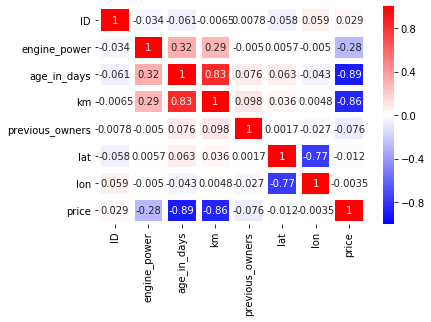

In [17]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True,linewidth=5,cmap='bwr')

In [18]:
x=data.drop('ID', axis=1)

In [19]:
x.head(5)

,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,lounge,51,882,25000,1,44.907242,8.611560,8900
1,pop,51,1186,32500,1,45.666359,12.241890,8800
2,sport,74,4658,142228,1,45.503300,11.417840,4200
3,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,pop,73,3074,106880,1,41.903221,12.495650,5700


In [20]:
data2=x.drop(['lat','lon'],axis=1)

In [21]:
data2.head(5)

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700


In [22]:
data2.shape

(1538, 6)

In [23]:
data3=pd.get_dummies(data2)

In [24]:
data3.head(4)

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1
3,51,2739,160000,1,6000,1,0,0


In [25]:
y=data3['price']
x=data3.drop('price',axis=1)

In [26]:
x.corr()

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
engine_power,1.000000,0.319190,0.285495,-0.005030,-0.133321,0.024783,0.217362
age_in_days,0.319190,1.000000,0.833890,0.075775,-0.259863,0.108327,0.313276
km,0.285495,0.833890,1.000000,0.097539,-0.255746,0.109024,0.303874
previous_owners,-0.005030,0.075775,0.097539,1.000000,-0.024643,-0.019316,0.084129
model_lounge,-0.133321,-0.259863,-0.255746,-0.024643,1.000000,-0.864605,-0.382017
model_pop,0.024783,0.108327,0.109024,-0.019316,-0.864605,1.000000,-0.134050
model_sport,0.217362,0.313276,0.303874,0.084129,-0.382017,-0.134050,1.000000


In [27]:
y.head(5)

0    8900
1    8800
2    4200
3    6000
4    5700
Name: price, dtype: int64

In [28]:
x.head(4)

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
0,51,882,25000,1,1,0,0
1,51,1186,32500,1,0,1,0
2,74,4658,142228,1,0,0,1
3,51,2739,160000,1,1,0,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

In [31]:
x_train.shape

(1030, 7)

In [32]:
y_test.shape

(508,)

In [33]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred=reg.predict(x_test)

In [35]:
y_pred

array([ 5867.6503378 ,  7133.70142341,  9866.35776216,  9723.28874535,
       10039.59101162,  9654.07582608,  9673.14563045, 10118.70728123,
        9903.85952664,  9351.55828437, 10434.34963575,  7732.26255693,
        7698.67240131,  6565.95240435,  9662.90103518, 10373.20344286,
        9599.94844451,  7699.34400418,  4941.33017994, 10455.2719478 ,
       10370.51555682, 10391.60424404,  7529.06622456,  9952.37340054,
        7006.13845729,  9000.1780961 ,  4798.36770637,  6953.10376491,
        7810.39767825,  9623.80497535,  7333.52158317,  5229.18705519,
        5398.21541073,  5157.65652129,  8948.63632836,  5666.62365159,
        9822.1231461 ,  8258.46551788,  6279.2040404 ,  8457.38443276,
        9773.86444066,  6767.04074749,  9182.99904787, 10210.05195479,
        8694.90545226, 10328.43369248,  9069.05761443,  8866.7826029 ,
        7058.39787506,  9073.33877162,  9412.68162121, 10293.69451263,
       10072.49011135,  6748.5794244 ,  9785.95841801,  9354.09969973,
      

In [36]:
filename='pricemodeldummy1'
pickle.dump(reg,open(filename,'wb'))

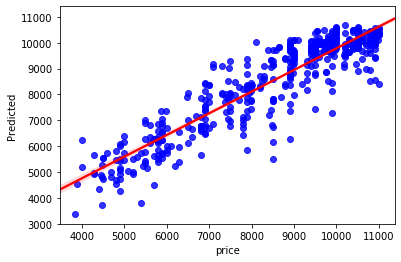

In [37]:
import matplotlib.pyplot as plt
#plt.scatter(y_pred,x_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(y_test, y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"}) 


In [38]:
from sklearn.metrics import r2_score

In [39]:
#r2_score is used to evluate the performnace of linear regression model
r2_score(y_test,y_pred)

0.8415526986865394

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
mean_squared_error(y_pred,y_test)

581887.727391353

In [42]:
results=pd.DataFrame(columns=['Actual','Predicted'])

In [43]:
results['Actual']=y_test
results['Predicted']=y_pred

In [49]:
results=results.reset_index()

In [50]:
results['id']=results.index

In [51]:
results.head(5)

,index,Actual,Predicted,id
0,481,7900,5867.650338,0
1,76,7900,7133.701423,1
2,1502,9400,9866.357762,2
3,669,8500,9723.288745,3
4,1409,9700,10039.591012,4


In [52]:
import matplotlib.pyplot as plt

[]

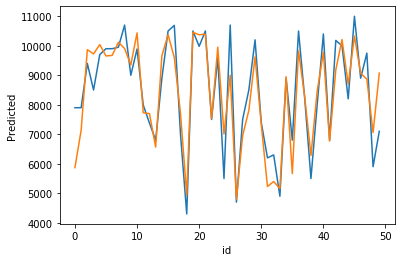

In [53]:
sns.lineplot(x='id',y='Actual',data=results.head(50))
sns.lineplot(x='id',y='Predicted',data=results.head(50))
plt.plot()

[]

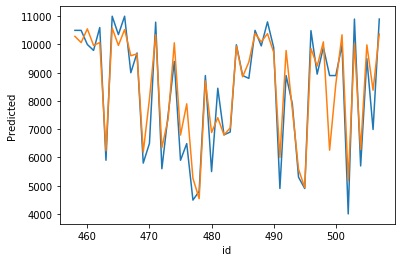

In [54]:
sns.lineplot(x='id',y='Actual',data=results.tail(50))
sns.lineplot(x='id',y='Predicted',data=results.tail(50))
plt.plot()

In [55]:
data.columns

Index(['ID', 'model', 'engine_power', 'age_in_days', 'km', 'previous_owners',
       'lat', 'lon', 'price'],
      dtype='object')

In [56]:
x_test.head(3)

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
481,51,3197,120000,2,0,1,0
76,62,2101,103000,1,0,1,0
1502,51,670,32473,1,1,0,0


In [57]:
new=[[62,2000,120000,1,1,0,0],[62,2500,125000,1,1,0,0],[62,3000,130000,1,1,0,0]]

In [58]:
real=reg.predict(new)

In [59]:
real

array([7235.86466187, 6717.98617178, 6200.10768169])

In [62]:
#for predicting single value new can use below 2 ways
#new=[[62,2000,120000,1,1,0,0]]
new=[62,4000,120000,1,1,0,0]

In [63]:
real=reg.predict([new])

In [64]:
real

array([5532.36672512])

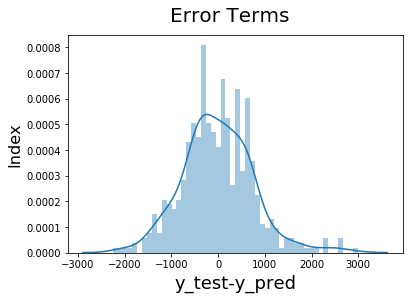

In [65]:
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [66]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [67]:
y_pred_lasso=lasso.predict(x_test)
r2_score(y_test,y_pred_lasso)

0.8417430453603184